# **DECISION TREE DATA WEATHER**

## Classification Data Weather


*   Data Weather


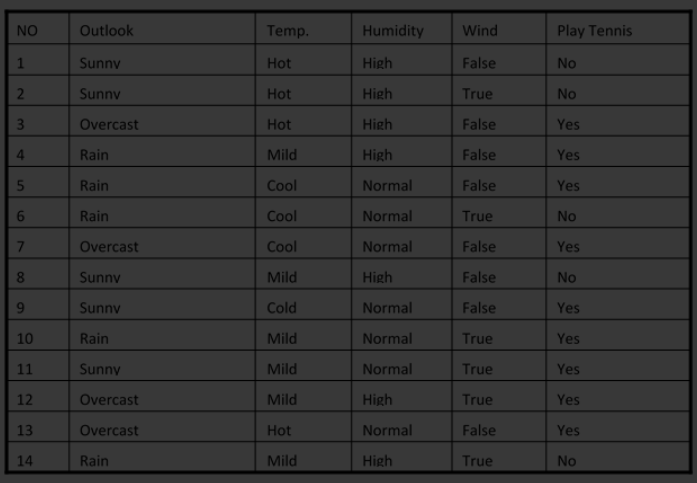


*   Perhitungan Entropy :


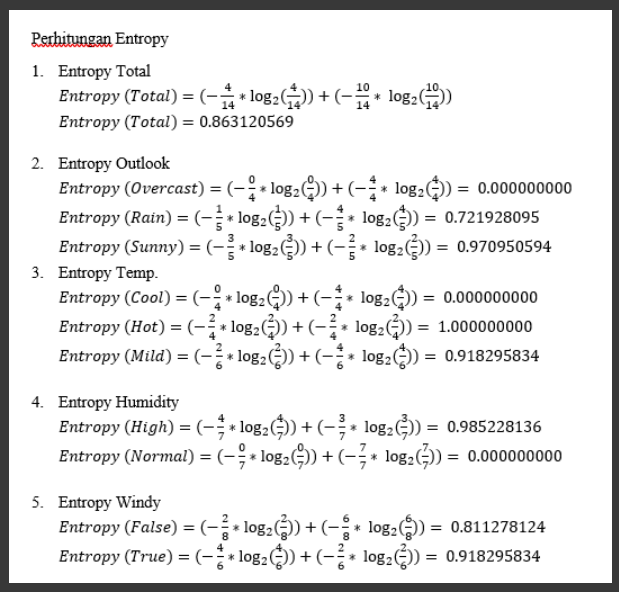


* Perhitungan Gain :     


1.   Gain (Total Outlook)

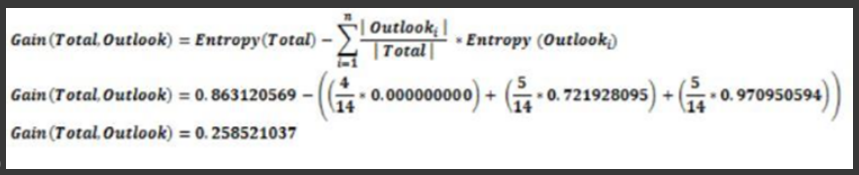


2.   Gain (Total, Temp.)

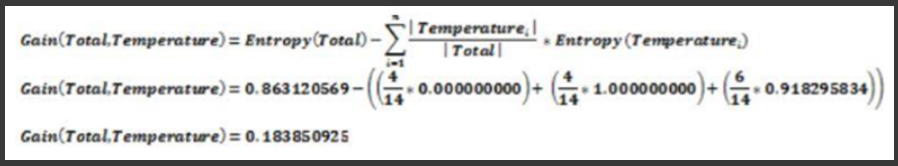


3.   Gain (Total, Humidity)

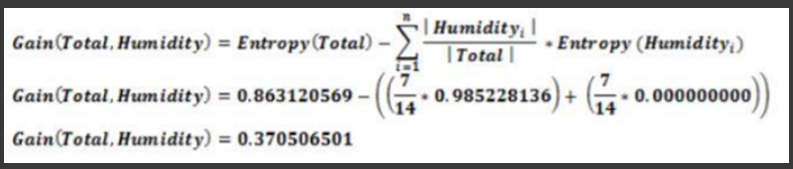


4.   Gain (Total, Windy)


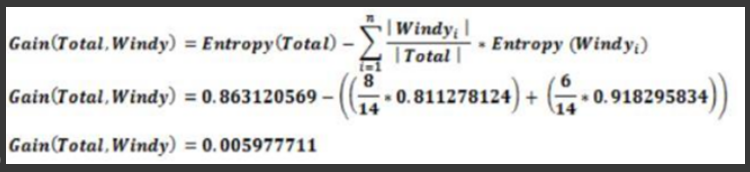


###Setelah melakukan perhitungan diatas, maka didapatkan nilai masing masing entropy dan gain. Kemudian nilai tersebut dimasukkan ke dalam tabel:


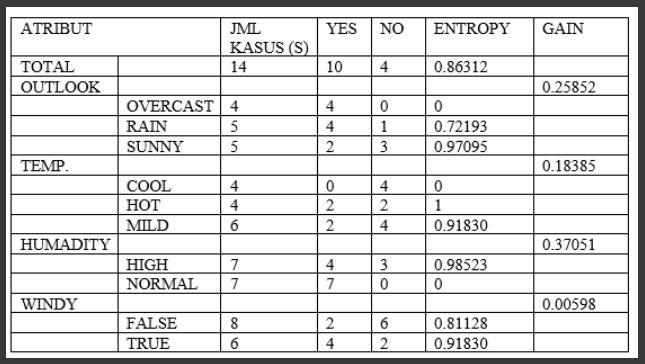


###Selanjutnya gain dengan nilai tertinggi yaitu humidity dengan sebesar 0.37051 dapat menjadi node akar lalu dilanjutkan sesuai nilai gain dari yang tertinggi ke terendah. Berikut adalah decision tree:


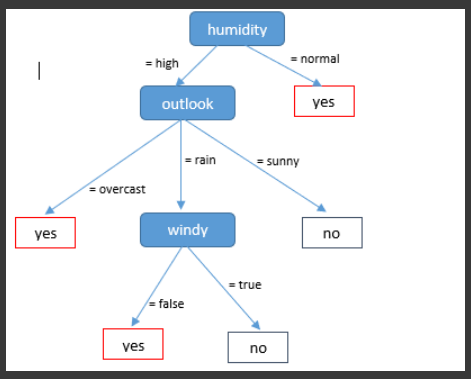




## Decision Tree Data Weather Menggunakan Python

In [1]:
## import dependencies
from sklearn import tree #For our Decision Tree
import pandas as pd # For our DataFrame
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

In [2]:
#Create the dataset
#create empty data frame
golf_df = pd.DataFrame()

#add outlook
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']

#add temperature
golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

#add humidity
golf_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

#add windy
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']

#finally add play
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
                  'yes', 'yes', 'no']


#Print/show the new data
print(golf_df)

     Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  false   no
1      sunny         hot     high   true   no
2   overcast         hot     high  false  yes
3      rainy        mild     high  false  yes
4      rainy        cool   normal  false  yes
5      rainy        cool   normal   true   no
6   overcast        cool   normal   true  yes
7      sunny        mild     high  false   no
8      sunny        cool   normal  false  yes
9      rainy        mild   normal  false  yes
10     sunny        mild   normal   true  yes
11  overcast        mild     high   true  yes
12  overcast         hot   normal  false  yes
13     rainy        mild     high   true   no


In [3]:
# Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
# I chose the variable name one_hot_data bescause in ML one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0)
one_hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])
#print the new dummy data
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [4]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier()
# Training the Decision Tree
clf_train = clf.fit(one_hot_data, golf_df['Play'])

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="x[6] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="x[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 8 ;
9 [label="x[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 11 ;
12 [label="gini = 0.0\nsam

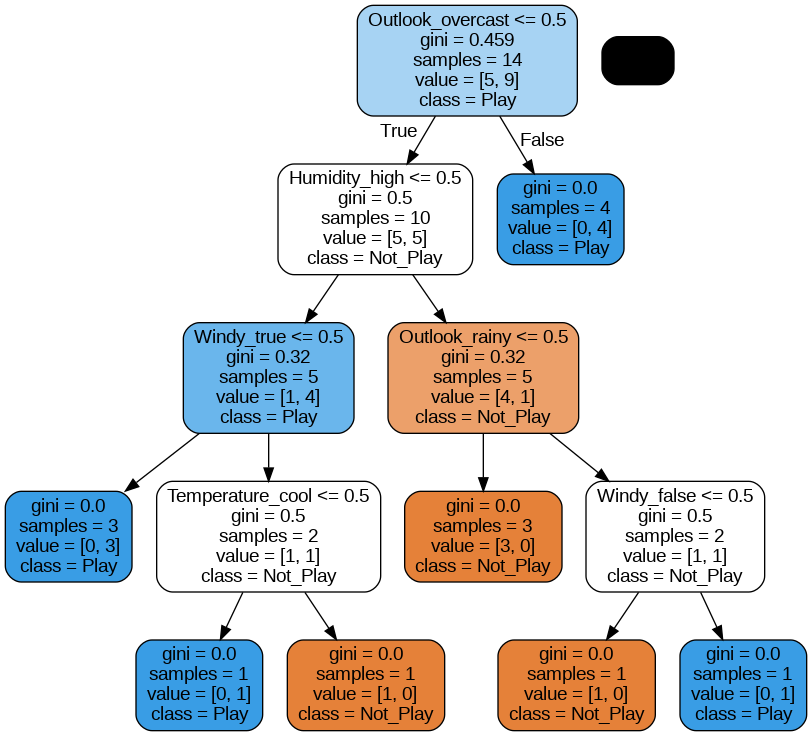

In [5]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())